In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import cv2
import moviepy.editor

In [2]:
os.chdir('..')
os.getcwd()

'/home/admin-gpu/Downloads/action_recognition/action_recognition'

# Train (как 80% исходного train)

Подвыборки `train` c 200 видео на каждый класс.

In [3]:
dataset_path = "data/interim/kinetics_700_2020/train/train_part.csv"
df = pd.read_csv(dataset_path, sep=",", index_col=False)

In [4]:
df

label                                         name_video
0            belly dancing  data/interim/kinetics_700_2020/train/videos/vi...
1             breakdancing  data/interim/kinetics_700_2020/train/videos/vi...
2           dancing ballet  data/interim/kinetics_700_2020/train/videos/vi...
3        jumpstyle dancing  data/interim/kinetics_700_2020/train/videos/vi...
4           square dancing  data/interim/kinetics_700_2020/train/videos/vi...
...                    ...                                                ...
1919      dancing macarena  data/interim/kinetics_700_2020/train/videos/vi...
1920        square dancing  data/interim/kinetics_700_2020/train/videos/vi...
1921        square dancing  data/interim/kinetics_700_2020/train/videos/vi...
1922      mosh pit dancing  data/interim/kinetics_700_2020/train/videos/vi...
1923  country line dancing  data/interim/kinetics_700_2020/train/videos/vi...

[1924 rows x 2 columns]

In [5]:
class_labels = df["label"].unique().tolist()

for label in class_labels:
    print(label)
    
print(len(class_labels))

belly dancing
breakdancing
dancing ballet
jumpstyle dancing
square dancing
country line dancing
tango dancing
robot dancing
dancing charleston
tap dancing
dancing macarena
swing dancing
mosh pit dancing
dancing gangnam style
salsa dancing
15


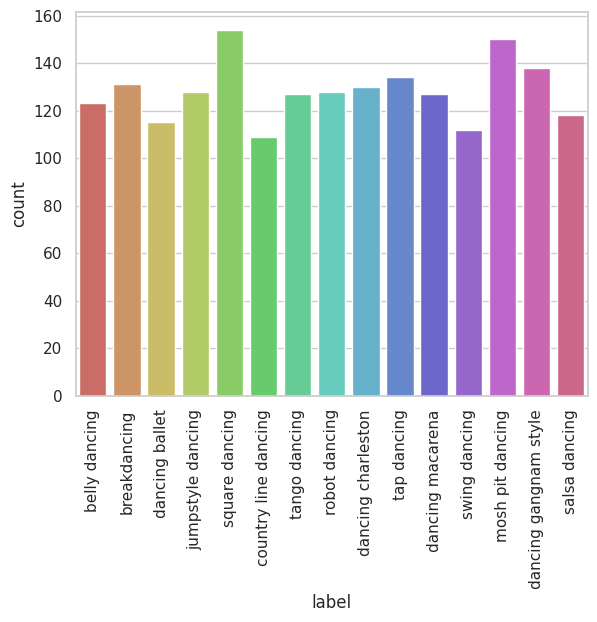

In [6]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
sns.countplot(x='label', data=pd.DataFrame(df["label"]), palette='hls', ax=ax)
ax.set_xticklabels(class_labels)
plt.xticks(rotation=90)
plt.show()

Максимально возможное число - 160 от исходных 200 видео на класс.Но из за недоступности для скачивание некоторых видео разброс все же есть.

In [7]:
def get_video_FPS(path_to_video):
    data = cv2.VideoCapture(path_to_video)
    fps = data.get(cv2.CAP_PROP_FPS)

    return fps

def get_video_frames_count(path_to_video):
    data = cv2.VideoCapture(path_to_video)
    frames = data.get(cv2.CAP_PROP_FRAME_COUNT)

    return frames

def get_video_duration(path_to_video):
    data = cv2.VideoCapture(path_to_video)

    frames = data.get(cv2.CAP_PROP_FRAME_COUNT)
    fps = data.get(cv2.CAP_PROP_FPS)

    duration = frames / fps

    return duration


def get_video_duration_moviepy(path_to_video):
    video = moviepy.editor.VideoFileClip(path_to_video)
    duration = video.duration
    
    return duration

In [8]:
df["duration_cv"] = df["name_video"].apply(get_video_duration)

In [9]:
df["duration_cv"].describe()

count    1924.000000
mean       10.006202
std         0.012112
min        10.000000
25%        10.000000
50%        10.000000
75%        10.010010
max        10.136157
Name: duration_cv, dtype: float64

<Axes: ylabel='Density'>

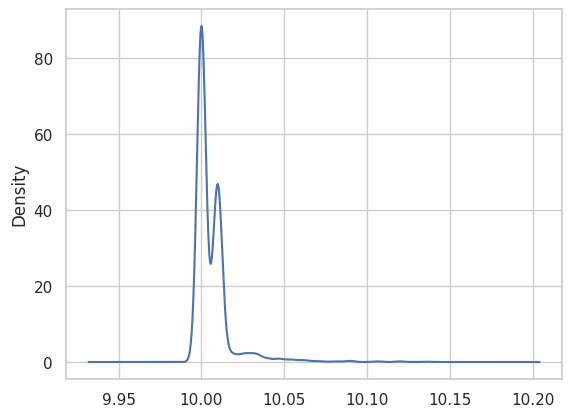

In [10]:
df["duration_cv"].plot(kind="kde")

In [11]:
df["duration_moviepy"] = df["name_video"].apply(get_video_duration_moviepy)

In [12]:
df["duration_moviepy"].describe()

count    1924.000000
mean       10.006341
std         0.012349
min        10.000000
25%        10.000000
50%        10.000000
75%        10.010000
max        10.140000
Name: duration_moviepy, dtype: float64

<Axes: ylabel='Density'>

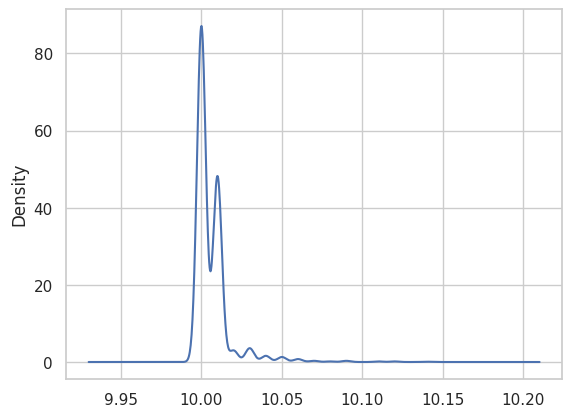

In [13]:
df["duration_moviepy"].plot(kind="kde")

In [14]:
df["frames_cv"] = df["name_video"].apply(get_video_frames_count)

In [15]:
df["frames_cv"].describe()

count    1924.000000
mean      263.982848
std        57.330130
min        60.000000
25%       250.000000
50%       300.000000
75%       300.000000
max       600.000000
Name: frames_cv, dtype: float64

(0.0, 400.0)

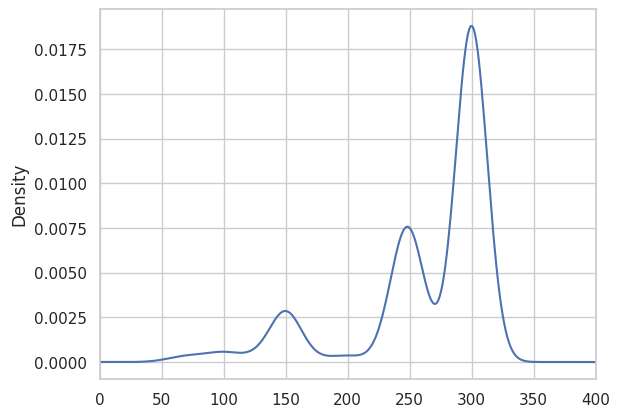

In [16]:
df["frames_cv"].plot(kind="kde")
plt.xlim([0, 400])

In [17]:
len(df[df["frames_cv"] > 150]) / len(df)

0.8835758835758836

In [18]:
df["fps_cv"] = df["name_video"].apply(get_video_FPS)

In [19]:
df["fps_cv"].describe()

count    1924.000000
mean       26.384028
std         5.733452
min         6.000000
25%        25.000000
50%        29.970000
75%        30.000000
max        60.000000
Name: fps_cv, dtype: float64

(0.0, 40.0)

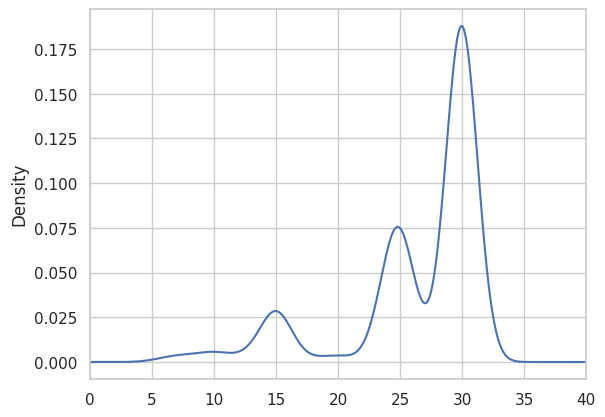

In [20]:
df["fps_cv"].plot(kind="kde")
plt.xlim([0, 40])

In [21]:
len(df[df["fps_cv"] < 12]) / len(df)

0.030145530145530147

In [22]:
# отфильтруем датасет, чтобы в нем были видео с fps >= 12.
dataset_path = "data/interim/kinetics_700_2020/train/train_part_above_fps12.csv"

df[df["fps_cv"] >= 12].to_csv(dataset_path, index=False)

Продолжительность всех видео 10 секунд.

# Val (как 20% исходного train)

Подвыборки `train` c 200 видео на каждый класс.

In [23]:
dataset_path = "data/interim/kinetics_700_2020/train/val_part.csv"
df = pd.read_csv(dataset_path, sep=",", index_col=False)

In [24]:
df

label                                         name_video
0              tap dancing  data/interim/kinetics_700_2020/train/videos/vi...
1            robot dancing  data/interim/kinetics_700_2020/train/videos/vi...
2    dancing gangnam style  data/interim/kinetics_700_2020/train/videos/vi...
3        jumpstyle dancing  data/interim/kinetics_700_2020/train/videos/vi...
4            swing dancing  data/interim/kinetics_700_2020/train/videos/vi...
..                     ...                                                ...
477   country line dancing  data/interim/kinetics_700_2020/train/videos/vi...
478   country line dancing  data/interim/kinetics_700_2020/train/videos/vi...
479            tap dancing  data/interim/kinetics_700_2020/train/videos/vi...
480          swing dancing  data/interim/kinetics_700_2020/train/videos/vi...
481       mosh pit dancing  data/interim/kinetics_700_2020/train/videos/vi...

[482 rows x 2 columns]

In [25]:
class_labels = df["label"].unique().tolist()

for label in class_labels:
    print(label)
    
print(len(class_labels))

tap dancing
robot dancing
dancing gangnam style
jumpstyle dancing
swing dancing
salsa dancing
mosh pit dancing
tango dancing
dancing ballet
square dancing
belly dancing
breakdancing
dancing macarena
country line dancing
dancing charleston
15


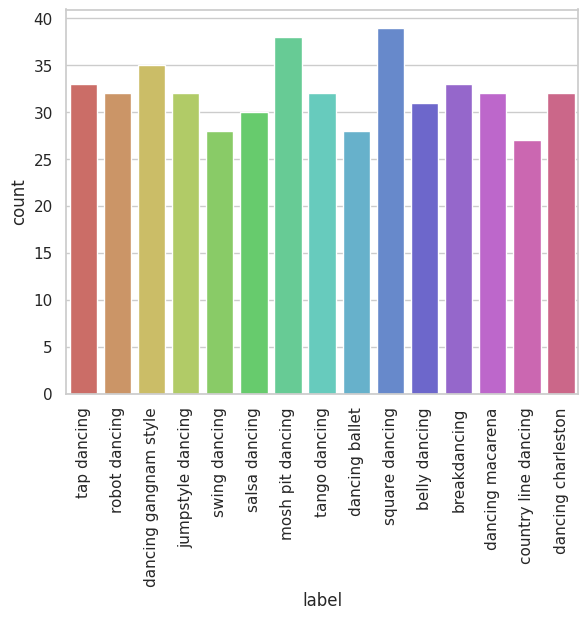

In [26]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
sns.countplot(x='label', data=pd.DataFrame(df["label"]), palette='hls', ax=ax)
ax.set_xticklabels(class_labels)
plt.xticks(rotation=90)
plt.show()

Максимально возможное число - 40 от исходных 200 видео на класс.Но из за недоступности для скачивание некоторых видео разброс все же есть.

In [27]:
df["duration_cv"] = df["name_video"].apply(get_video_duration)

In [28]:
df["duration_cv"].describe()

count    482.000000
mean      10.007605
std        0.012440
min       10.000000
25%       10.000000
50%       10.000000
75%       10.010010
max       10.089910
Name: duration_cv, dtype: float64

<Axes: ylabel='Density'>

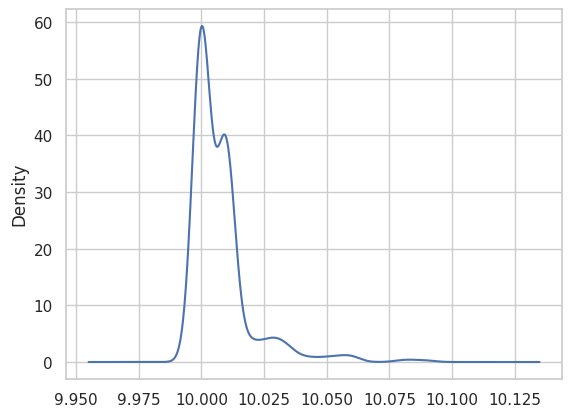

In [29]:
df["duration_cv"].plot(kind="kde")

In [30]:
df["duration_moviepy"] = df["name_video"].apply(get_video_duration_moviepy)

In [31]:
df["duration_moviepy"].describe()

count    482.000000
mean      10.007759
std        0.012651
min       10.000000
25%       10.000000
50%       10.000000
75%       10.010000
max       10.090000
Name: duration_moviepy, dtype: float64

<Axes: ylabel='Density'>

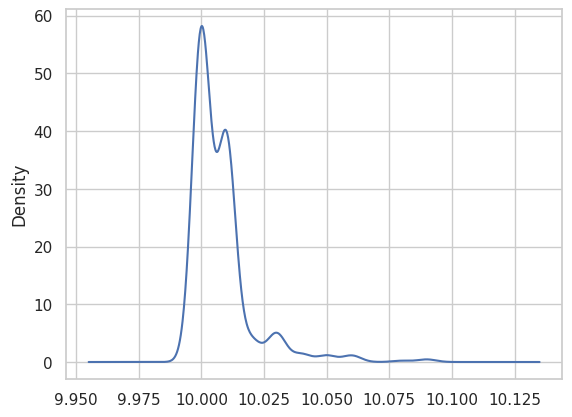

In [32]:
df["duration_moviepy"].plot(kind="kde")

Продолжительность всех видео 10 секунд.

In [33]:
df["frames_cv"] = df["name_video"].apply(get_video_frames_count)

In [34]:
df["frames_cv"].describe()

count    482.000000
mean     259.319502
std       58.451088
min       60.000000
25%      240.000000
50%      300.000000
75%      300.000000
max      300.000000
Name: frames_cv, dtype: float64

(0.0, 400.0)

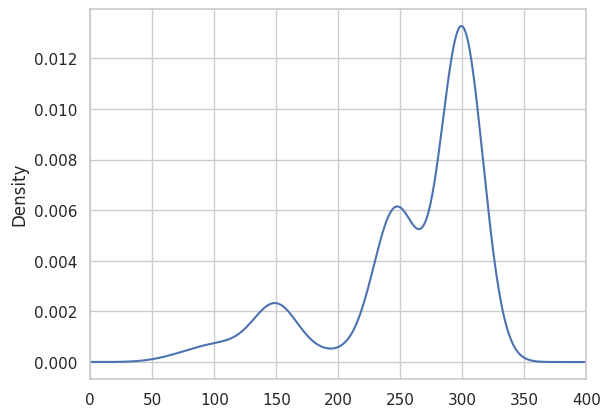

In [35]:
df["frames_cv"].plot(kind="kde")
plt.xlim([0, 400])

In [36]:
len(df[df["frames_cv"] < 350]) / len(df)

1.0

In [37]:
df["fps_cv"] = df["name_video"].apply(get_video_FPS)

In [38]:
df["fps_cv"].describe()

count    482.000000
mean      25.914544
std        5.846050
min        6.000000
25%       24.000000
50%       29.970000
75%       29.970000
max       30.000000
Name: fps_cv, dtype: float64

(0.0, 40.0)

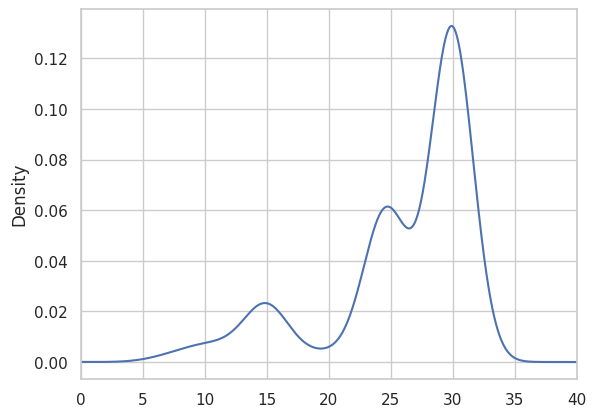

In [39]:
df["fps_cv"].plot(kind="kde")
plt.xlim([0, 40])

In [40]:
len(df[df["fps_cv"] < 12]) / len(df)

0.035269709543568464

In [41]:
# отфильтруем датасет, чтобы в нем были видео с fps >= 12.
dataset_path = "data/interim/kinetics_700_2020/train/val_part_above_fps12.csv"

df[df["fps_cv"] >= 12].to_csv(dataset_path, index=False)

# Test (как исходный val)

Исходная `val` подвыборка c 50 видео на каждый класс.

In [42]:
dataset_path = "data/interim/kinetics_700_2020/val/val.csv"
df = pd.read_csv(dataset_path, sep=",", index_col=False)

In [43]:
df

label                                         name_video
0    belly dancing  data/interim/kinetics_700_2020/val/videos/vide...
1    belly dancing  data/interim/kinetics_700_2020/val/videos/vide...
2    belly dancing  data/interim/kinetics_700_2020/val/videos/vide...
3    belly dancing  data/interim/kinetics_700_2020/val/videos/vide...
4    belly dancing  data/interim/kinetics_700_2020/val/videos/vide...
..             ...                                                ...
580    tap dancing  data/interim/kinetics_700_2020/val/videos/vide...
581    tap dancing  data/interim/kinetics_700_2020/val/videos/vide...
582    tap dancing  data/interim/kinetics_700_2020/val/videos/vide...
583    tap dancing  data/interim/kinetics_700_2020/val/videos/vide...
584    tap dancing  data/interim/kinetics_700_2020/val/videos/vide...

[585 rows x 2 columns]

In [44]:
class_labels = df["label"].unique().tolist()

for label in class_labels:
    print(label)
    
print(len(class_labels))

belly dancing
breakdancing
country line dancing
dancing ballet
dancing charleston
dancing gangnam style
dancing macarena
jumpstyle dancing
mosh pit dancing
robot dancing
salsa dancing
square dancing
swing dancing
tango dancing
tap dancing
15


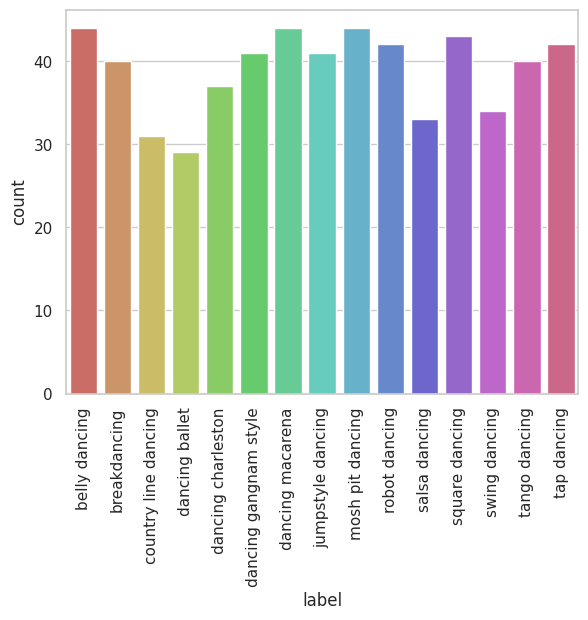

In [45]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
sns.countplot(x='label', data=pd.DataFrame(df["label"]), palette='hls', ax=ax)
ax.set_xticklabels(class_labels)
plt.xticks(rotation=90)
plt.show()

Максимально возможное число - 50 от исходных 50 видео на класс.

In [46]:
df["duration_cv"] = df["name_video"].apply(get_video_duration)

In [47]:
df["duration_cv"].describe()

count    585.000000
mean      10.006889
std        0.013728
min       10.000000
25%       10.000000
50%       10.000000
75%       10.010010
max       10.119840
Name: duration_cv, dtype: float64

<Axes: ylabel='Density'>

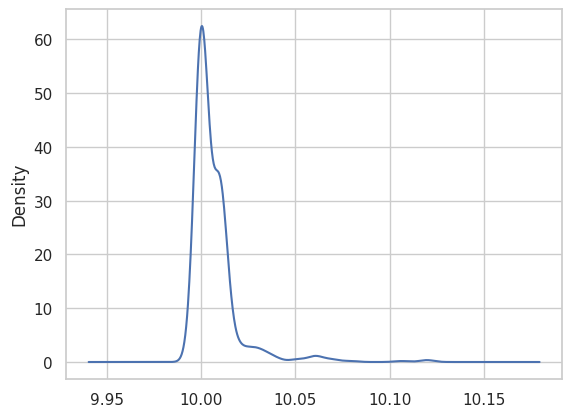

In [48]:
df["duration_cv"].plot(kind="kde")

In [49]:
df["duration_moviepy"] = df["name_video"].apply(get_video_duration_moviepy)

In [50]:
df["duration_moviepy"].describe()

count    585.000000
mean      10.006991
std        0.013880
min       10.000000
25%       10.000000
50%       10.000000
75%       10.010000
max       10.120000
Name: duration_moviepy, dtype: float64

<Axes: ylabel='Density'>

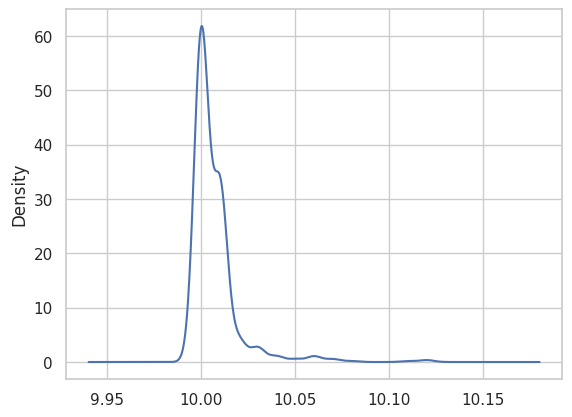

In [51]:
df["duration_moviepy"].plot(kind="kde")

Продолжительность всех видео 10 секунд.

In [52]:
df["frames_cv"] = df["name_video"].apply(get_video_frames_count)

In [53]:
df["frames_cv"].describe()

count    585.000000
mean     262.608547
std       58.306426
min       60.000000
25%      250.000000
50%      300.000000
75%      300.000000
max      300.000000
Name: frames_cv, dtype: float64

(0.0, 400.0)

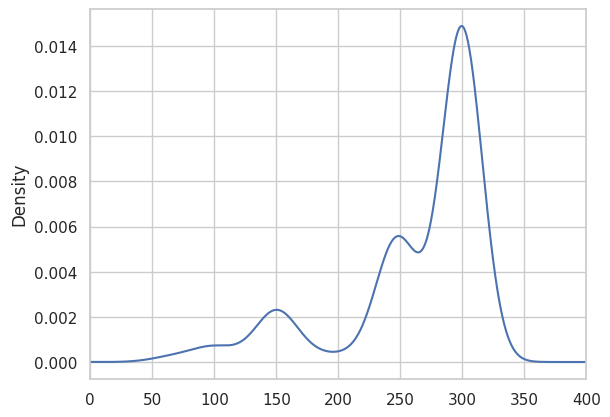

In [54]:
df["frames_cv"].plot(kind="kde")
plt.xlim([0, 400])

In [55]:
len(df[df["frames_cv"] < 350]) / len(df)

1.0

In [56]:
df["fps_cv"] = df["name_video"].apply(get_video_FPS)

In [57]:
df["fps_cv"].describe()

count    585.000000
mean      26.245607
std        5.831863
min        6.000000
25%       25.000000
50%       29.970000
75%       30.000000
max       30.000000
Name: fps_cv, dtype: float64

(0.0, 40.0)

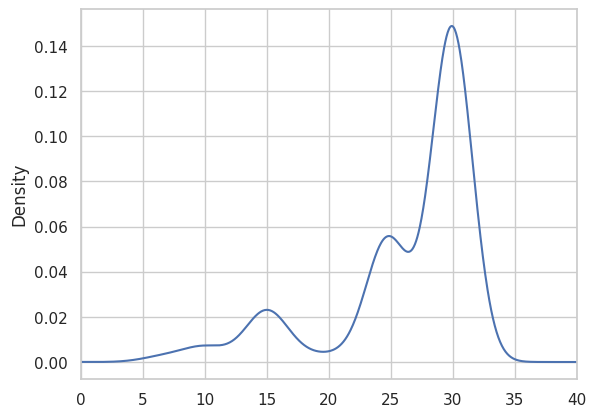

In [58]:
df["fps_cv"].plot(kind="kde")
plt.xlim([0, 40])

In [59]:
len(df[df["fps_cv"] < 12]) / len(df)

0.037606837606837605

In [60]:
# отфильтруем датасет, чтобы в нем были видео с fps >= 12.
dataset_path = "data/interim/kinetics_700_2020/val/val_above_fps12.csv"

df[df["fps_cv"] >= 12].to_csv(dataset_path, index=False)